# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #FDD20E; text-align: center; line-height: 0.75;background-color: #2ECC40"><b>Heart Failure Prediction</b><br></h1>

<center>
    <img src="https://pbs.twimg.com/media/EMegdyIX0AAwahp.jpg" alt="Heart Failure Prediction" width="50%">
</center>

### Problem Statement :

With a plethora of medical data available and the rise of Data Science, a host of startups are taking up the challenge of attempting to create indicators for the forseen diseases that might be contracted! Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help. In this way, we try to solve automate another problem that occurs in the nature with a view to counter it and focus on to the next problem with the help of AI techniques!

### Aim :
- To classify / predict whether a patient is prone to heart failure depending on multiple attributes.
- It is a **binary classification** with multiple numerical and categorical features.

### Notebook Contents :
- Dataset Information
- Exploratory Data Analysis (EDA)
- Summary of EDA
- Modeling
- Conclusion
​
### What you will learn :
- Data Visualization
- Data Scaling
- Statistical Tests for Feature Engineering
- Modeling and visualization of results for algorithms


### Let's Get Started !!!


# <center><div style="font-family: Trebuchet MS; background-color: #F93822; color: #FDD20E; padding: 12px; line-height: 1;">Dataset Information</div></center>

### Import the Necessary Libraries :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier  

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5000)

## **Importing the Dataset** 

In [3]:
df=pd.read_csv("/kaggle/input/heart-disease-prediction/Main.csv")
df.head()

,X_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,X_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHONE,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,ADDEPEV3,CHCKDNY2,DIABETE4,DIABAGE3,LASTDEN4,RMVTETH4,MARITAL,EDUCA,RENTHOM1,NUMHHOL3,NUMPHON3,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME2,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,SHINGLE2,PNEUVAC4,FALL12MN,FALLINJ4,SEATBELT,DRNKDRI2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PCPSAAD3,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,COLNSCPY,COLNTEST,SIGMSCPY,SIGMTEST,BLDSTOL1,LSTBLDS4,STOOLDNA,SDNATEST,VIRCOLON,VCLNTEST,HIVTST7,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN1,BLDSUGAR,FEETCHK3,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM1,DIABEYE,DIABEDU,TOLDCFS,HAVECFS,WORKCFS,TOLDHEPC,TRETHEPC,PRIRHEPC,HAVEHEPC,HAVEHEPB,MEDSHEPB,HLTHCVR1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ECIGARET,ECIGNOW,MARIJAN1,USEMRJN2,RSNMRJN1,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PCPSADE1,PCDMDEC1,HPVADVC4,HPVADSHT,TETANUS1,IMFVPLA1,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,X_METSTAT,X_URBSTAT,MSCODE,X_STSTR,X_STRWT,X_RAWRAKE,X_WT2RAKE,X_IMPRACE,X_CHISPNC,X_CRACE1,X_CPRACE,X_CLLCPWT,X_DUALUSE,X_DUALCOR,X_LLCPWT2,X_LLCPWT,X_RFHLTH,X_PHYS14D,X_MENT14D,X_HCVU651,X_TOTINDA,X_MICHD,X_LTASTH1,X_CASTHM1,X_ASTHMS1,X_DRDXAR2,X_EXTETH3,X_ALTETH3,X_DENVST3,X_PRACE1,X_MRACE1,X_HISPANC,X_RACE,X_RACEG21,X_RACEGR3,X_RACEPRV,X_SEX,X_AGEG5YR,X_AGE65YR,X_AGE80,X_AGE_G,HTIN4,HTM4,WTKG3,X_BMI5,X_BMI5CAT,X_RFBMI5,X_CHLDCNT,X_EDUCAG,X_INCOMG,X_SMOKER3,X_RFSMOK3,DRNKANY5,DROCDY3_,X_RFBING5,X_DRNKWK1,X_RFDRHV7,X_FLSHOT7,X_PNEUMO3,X_RFSEAT2,X_RFSEAT3,X_DRNKDRV,X_RFMAM22,X_MAM5023,X_RFPAP35,X_RFPSA23,X_CLNSCPY,X_SGMSCPY,X_SGMS10Y,X_RFBLDS4,X_STOLDNA,X_VIRCOLN,X_SBONTIM,X_CRCREC1,X_AIDTST4
0,1,1,1042020,1,4,2020,1100,2020000001,2020000001,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,35.0,1.0,2.0,2.0,6.0,1.0,2.0,NaN,1.0,2.0,4.0,88.0,1.0,NaN,106.0,507.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,3.0,888.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,88.0,NaN,1.0,NaN,1.0,3.0,1.0,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,21994.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,10,1,1.0,1.0,1.0,11011,69.640207,1.0,69.640207,1,NaN,NaN,NaN,NaN,1,0.465411,460.002849,284.335672,1,2,3,2,1,2.0,2,2,1,1.0,2,NaN,1,1.0,1.0,2,1.0,1.0,1.0,1.0,2,8,1,56,5,67.0,170.0,4808.0,1660.0,1.0,1,1,4,1,1,2,2,0,1,0,1,NaN,NaN,1,1,9,2.0,2.0,NaN,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1,1,2072020,2,7,2020,1200,2020000002,2020000002,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,NaN,1.0,1.0,3.0,6.0,1.0,1.0,1.0,1.0,2.0,7.0,88.0,99.0,NaN,170.0,504.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:
df.shape

(401958, 279)

In [5]:
df.columns

Index(['X_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', 'X_PSU', 'CTELENM1',
       ...
       'X_RFPSA23', 'X_CLNSCPY', 'X_SGMSCPY', 'X_SGMS10Y', 'X_RFBLDS4',
       'X_STOLDNA', 'X_VIRCOLN', 'X_SBONTIM', 'X_CRCREC1', 'X_AIDTST4'],
      dtype='object', length=279)

In [6]:
df.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Data columns (total 279 columns):
 #    Column     Dtype  
---   ------     -----  
 0    X_STATE    int64  
 1    FMONTH     int64  
 2    IDATE      int64  
 3    IMONTH     int64  
 4    IDAY       int64  
 5    IYEAR      int64  
 6    DISPCODE   int64  
 7    SEQNO      int64  
 8    X_PSU      int64  
 9    CTELENM1   float64
 10   PVTRESD1   float64
 11   COLGHOUS   float64
 12   STATERE1   float64
 13   CELPHONE   float64
 14   LADULT1    float64
 15   COLGSEX    float64
 16   NUMADULT   float64
 17   LANDSEX    float64
 18   NUMMEN     float64
 19   NUMWOMEN   float64
 20   RESPSLCT   float64
 21   SAFETIME   float64
 22   CTELNUM1   float64
 23   CELLFON5   float64
 24   CADULT1    float64
 25   CELLSEX    float64
 26   PVTRESD3   float64
 27   CCLGHOUS   float64
 28   CSTATE1    float64
 29   LANDLINE   float64
 30   HHADULT    float64
 31   SEXVAR     int64  
 32   GENHLTH    float64
 33   PHYSHLT

In [7]:
df.isnull().sum()

X_STATE           0
FMONTH            0
IDATE             0
IMONTH            0
IDAY              0
IYEAR             0
DISPCODE          0
SEQNO             0
X_PSU             0
CTELENM1     277207
PVTRESD1     277207
COLGHOUS     401935
STATERE1     277207
CELPHONE     277207
LADULT1      277207
COLGSEX      401935
NUMADULT     277216
LANDSEX      350509
NUMMEN       291536
NUMWOMEN     291536
RESPSLCT     354532
SAFETIME     124751
CTELNUM1     124751
CELLFON5     124751
CADULT1      124755
CELLSEX      124771
PVTRESD3     124752
CCLGHOUS     400979
CSTATE1      124758
LANDLINE     124752
HHADULT      124753
SEXVAR            0
GENHLTH           8
PHYSHLTH          5
MENTHLTH          5
POORHLTH     200343
HLTHPLN1          3
PERSDOC2          3
MEDCOST           3
CHECKUP1          5
EXERANY2          3
SLEPTIM1          3
CVDINFR4          6
CVDCRHD4          3
CVDSTRK3          3
ASTHMA3           3
ASTHNOW      347817
CHCSCNCR          3
CHCOCNCR          3
CHCCOPD2          5


In [ ]:
# Count ofnumber of columns having null values
df.isnull().any().sum()

In [9]:
df.duplicated().any()

False

### <center>Dataset Attributes</center>

- Attributes are selected based on the metadata and their relevance to problem statement.

- **SEXVAR** :- MALE 1, FEMALE 2
- **GENHLTH** :- 1. Excellent, 2. Very good, 3. Good, 4. Fair, 5. Poor,  7. Don’t know/Not Sure,  9. Refused
- **SLEPTIM1** :- On average, how many hours of sleep do you get in a 24-hour period?(Continuous variable)
- **CVDINFR4** :- (Ever told) you had a heart attack, also called a myocardial infarction?
               1. yes, 2. no, 7. don't know/not sure, 9. refused
- **CVDCRHD4** :- (Ever told) (you had) angina or coronary heart disease?
               1. yes, 2. no, 7. don't know/not sure, 9. refused
- **CVDSTRK3** :- (Ever told) (you had) a stroke.
               1. yes, 2. no, 7. don't know/not sure, 9. refused
- **ASTHMA3** :-  (Ever told) (you had) asthma?     
               1. yes, 2. no, 7. don't know/not sure, 9. refused
- **CHCSCNCR** :- (Ever told) (you had) skin cancer?               
               1. yes, 2. no, 7. don't know/not sure, 9. refused
- **CHCCOPD2** :- (Ever told) (you had) chronic obstructive pulmonary disease, C.O.P.D., emphysema or chronic                          bronchitis?   1. yes, 2. no, 7. don't know/not sure, 9. refused          
- **HAVARTH4** :- <p> (Ever told) (you had) some form of arthritis, rheumatoid  arthritis, gout, lupus, or fibromyalgia?                   (Arthritis diagnoses include: rheumatism, polymyalgia rheumatica; osteoarthritis (not osteporosis);                  tendonitis, bursitis, bunion, tennis elbow; carpal tunnel syndrome, tarsal tunnel syndrome; joint                  infection, etc.)
    1. yes, 2. no, 7. don't know/not sure, 9. refused </p>
- **ADDEPEV3** :- <p> (Ever told) (you had) a depressive disorder (including depression, major depression, dysthymia, or                  minor depression)?
    1. yes, 2. no, 7. don't know/not sure, 9. refused </p>
- **MARITAL** :-  <p> 1 Married, 2 Divorced, 3 Widowed, 4 Separated, 5 Never married, 6 A member of an unmarried couple,9 Refused. </p>
- **DECIDE** :-<p> Because of a physical, mental, or emotional condition, do you have serious difficulty concentrating,               remembering, or making decisions?
     1. yes, 2. no, 7. don't know/not sure, 9. refused </p>
- **DIFFWALK** :-<p> Do you have serious difficulty walking or climbing stairs?
     1. yes, 2. no, 7. don't know/not sure, 9. refused </p>           
- **SMOKE100** :- <p> Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 
     1. yes, 2. no, 7. don't know/not sure, 9. refused </p>
- **FLUSHOT7** :- <p> During the past 12 months, have you had either flu vaccine that was sprayed in your nose or flu shot               injected into your arm?
     1. yes, 2. no, 7. don't know/not sure, 9. refused </p>
- **SEATBELT** :- <p> 1.Always, 2.Nearly always, 3.Sometimes, 4.Seldom, 5.Never, 7.Don’t know/Not sure, 8.Never drive or ride in a car—Go to Section 9.Refused </p>
- **X_PHYS14D** :-<p> 3 level not good physical health status: 0 days, 1-13 days, 14-30 days.
1) Zero days when physical health not good, 2) 1-13 days when physical health not good, 3) 14+ days when physical health not good, 9) Don’t know/Refused/Missing </p>
- **X_MENT14D** :- <p> 3 level not good mental health status: 0 days, 1-13 days, 14-30 days.
 1) Zero days when physical health not good, 2) 1-13 days when physical health not good, 3) 14+ days when physical health not good, 9) Don’t know/Refused/Missing </p>
- **X_DRDXAR2** :- <p> Respondents who have had a doctor diagnose them as having some form of arthritis               
               1. Yes, 2.NO </p>
- **X_AGE_G** :- <p> Six-level imputed age category
             1) Age18to24, 2) Age25to34, 3) Age35to44, 4)Age45to54 5)Age55to64 6)Age 65 or older </p>
- **X_BMI5CAT** :- <p> Four-categories of Body Mass Index (BMI)
              1) Underweight _BMI5 < 1850, 2) Normal Weight Notes: 1850 <= _BMI5 < 2500
                                                                                       3) Overweight Notes: 2500 <= _BMI5 < 3000 4) Obese Notes: 3000 <= _BMI5 < 9999 </p>
- **X_RFDRHV7** :- <p> Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7                    drinks per week)
               1. No, 2. Yes </p>
- **EXERANY2** :- <p> During the past month, other than your regular job, did you participate in any physical activities or               exercises such as running, calisthenics, golf, gardening, or walking for exercise? 
              1. yes, 2. no, 7. don't know/not sure, 9. refused </P>
- **CHCKDNY2** :- <p> Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney                   disease?  1. yes, 2. no, 7. don't know/not sure, 9. refused </p>
- **CHCOCNCR** :- <p> (Ever told) (you had) any other types of cancer?
              1. yes, 2. no, 7. don't know/not sure, 9. refused </P>
- **X_MICHD** :- <p> output class: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)              1. Yes, 2.NO </p>
               

In [10]:
df.rename(columns = {'_MICHD':'X_MICHD', '_BMI5CAT':'X_BMI5CAT',
                              '_SMOKER3':'X_SMOKER3','_AGE_G':'X_AGE_G','_IMPRACE':'X_IMPRACE','_MENT14D':'X_MENT14D',
                        '_PHYS14D':'X_PHYS14D'}, inplace = True)

In [11]:
df.head()

,X_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,X_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHONE,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,ADDEPEV3,CHCKDNY2,DIABETE4,DIABAGE3,LASTDEN4,RMVTETH4,MARITAL,EDUCA,RENTHOM1,NUMHHOL3,NUMPHON3,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME2,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,SHINGLE2,PNEUVAC4,FALL12MN,FALLINJ4,SEATBELT,DRNKDRI2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PCPSAAD3,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,COLNSCPY,COLNTEST,SIGMSCPY,SIGMTEST,BLDSTOL1,LSTBLDS4,STOOLDNA,SDNATEST,VIRCOLON,VCLNTEST,HIVTST7,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN1,BLDSUGAR,FEETCHK3,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM1,DIABEYE,DIABEDU,TOLDCFS,HAVECFS,WORKCFS,TOLDHEPC,TRETHEPC,PRIRHEPC,HAVEHEPC,HAVEHEPB,MEDSHEPB,HLTHCVR1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ECIGARET,ECIGNOW,MARIJAN1,USEMRJN2,RSNMRJN1,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PCPSADE1,PCDMDEC1,HPVADVC4,HPVADSHT,TETANUS1,IMFVPLA1,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,X_METSTAT,X_URBSTAT,MSCODE,X_STSTR,X_STRWT,X_RAWRAKE,X_WT2RAKE,X_IMPRACE,X_CHISPNC,X_CRACE1,X_CPRACE,X_CLLCPWT,X_DUALUSE,X_DUALCOR,X_LLCPWT2,X_LLCPWT,X_RFHLTH,X_PHYS14D,X_MENT14D,X_HCVU651,X_TOTINDA,X_MICHD,X_LTASTH1,X_CASTHM1,X_ASTHMS1,X_DRDXAR2,X_EXTETH3,X_ALTETH3,X_DENVST3,X_PRACE1,X_MRACE1,X_HISPANC,X_RACE,X_RACEG21,X_RACEGR3,X_RACEPRV,X_SEX,X_AGEG5YR,X_AGE65YR,X_AGE80,X_AGE_G,HTIN4,HTM4,WTKG3,X_BMI5,X_BMI5CAT,X_RFBMI5,X_CHLDCNT,X_EDUCAG,X_INCOMG,X_SMOKER3,X_RFSMOK3,DRNKANY5,DROCDY3_,X_RFBING5,X_DRNKWK1,X_RFDRHV7,X_FLSHOT7,X_PNEUMO3,X_RFSEAT2,X_RFSEAT3,X_DRNKDRV,X_RFMAM22,X_MAM5023,X_RFPAP35,X_RFPSA23,X_CLNSCPY,X_SGMSCPY,X_SGMS10Y,X_RFBLDS4,X_STOLDNA,X_VIRCOLN,X_SBONTIM,X_CRCREC1,X_AIDTST4
0,1,1,1042020,1,4,2020,1100,2020000001,2020000001,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,35.0,1.0,2.0,2.0,6.0,1.0,2.0,NaN,1.0,2.0,4.0,88.0,1.0,NaN,106.0,507.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,3.0,888.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,88.0,NaN,1.0,NaN,1.0,3.0,1.0,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,21994.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,10,1,1.0,1.0,1.0,11011,69.640207,1.0,69.640207,1,NaN,NaN,NaN,NaN,1,0.465411,460.002849,284.335672,1,2,3,2,1,2.0,2,2,1,1.0,2,NaN,1,1.0,1.0,2,1.0,1.0,1.0,1.0,2,8,1,56,5,67.0,170.0,4808.0,1660.0,1.0,1,1,4,1,1,2,2,0,1,0,1,NaN,NaN,1,1,9,2.0,2.0,NaN,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1,1,2072020,2,7,2020,1200,2020000002,2020000002,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,NaN,1.0,1.0,3.0,6.0,1.0,1.0,1.0,1.0,2.0,7.0,88.0,99.0,NaN,170.0,504.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [12]:
new2_df = df[['X_MICHD','X_BMI5CAT','X_SMOKER3','CVDSTRK3','SEXVAR','CVDINFR4'
            ,'X_AGE_G','X_IMPRACE','EXERANY2','GENHLTH','ADDEPEV3','SLEPTIM1','ASTHMA3','X_MENT14D',
             'CHCKDNY2','CHCSCNCR','X_PHYS14D','CHCOCNCR','CHCCOPD2','MARITAL','DIFFWALK']]
new2_df.head()

,X_MICHD,X_BMI5CAT,X_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,X_AGE_G,X_IMPRACE,EXERANY2,GENHLTH,ADDEPEV3,SLEPTIM1,ASTHMA3,X_MENT14D,CHCKDNY2,CHCSCNCR,X_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
0,2.0,1.0,1,2.0,2,2.0,5,1,1.0,2.0,1.0,5.0,1.0,3,2.0,1.0,2,1.0,1.0,2.0,2.0
1,2.0,3.0,9,2.0,2,2.0,6,2,1.0,3.0,1.0,7.0,1.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
2,2.0,NaN,4,2.0,2,2.0,6,2,1.0,3.0,2.0,7.0,2.0,1,2.0,2.0,1,1.0,2.0,1.0,2.0
3,2.0,NaN,4,2.0,2,2.0,6,1,2.0,1.0,2.0,6.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
4,2.0,2.0,4,1.0,2,2.0,6,1,1.0,2.0,2.0,7.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0


In [13]:
new2_df.shape

(401958, 21)

### Analyzing categorical variables and replacing null values

In [14]:
new2_df.isnull().sum()

X_MICHD       3571
X_BMI5CAT    41357
X_SMOKER3        0
CVDSTRK3         3
SEXVAR           0
CVDINFR4         6
X_AGE_G          0
X_IMPRACE        0
EXERANY2         3
GENHLTH          8
ADDEPEV3         6
SLEPTIM1         3
ASTHMA3          3
X_MENT14D        0
CHCKDNY2         6
CHCSCNCR         3
X_PHYS14D        0
CHCOCNCR         3
CHCCOPD2         5
MARITAL         12
DIFFWALK     15280
dtype: int64

<Axes: >

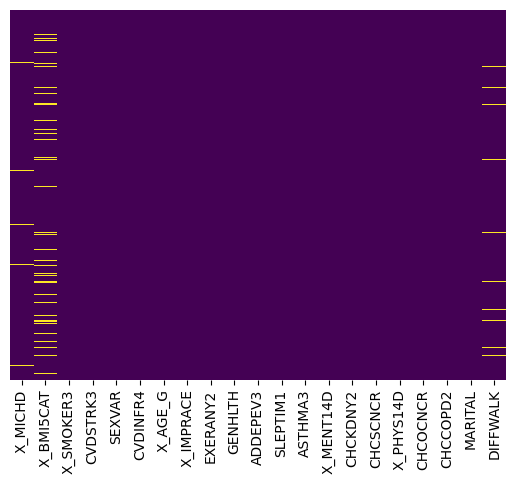

In [15]:
### VISUALISING THE MISSING VALUES
sns.heatmap(new2_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
new3_df=new2_df.drop("SLEPTIM1",axis=1)

In [17]:
# Checking Target column

new2_df["X_MICHD"].unique() #here 2 means no and yes means 1, so that replacing itnew2_df["X_MICHD"].unique()

array([ 2.,  1., nan])

In [18]:
new2_df["X_MICHD"] = new2_df["X_MICHD"].replace({2: 0, 1: 1})
#0 no 1 Yes
new2_df["X_MICHD"].unique()

array([ 0.,  1., nan])

In [19]:
columns_list=pd.Series(new3_df.columns)

In [20]:
def check_unique(l):
  for i in l:
    print("unnique values in  ",i,"is ", new2_df[i].unique())

In [21]:
check_unique(columns_list)

unnique values in   X_MICHD is  [ 0.  1. nan]
unnique values in   X_BMI5CAT is  [ 1.  3. nan  2.  4.]
unnique values in   X_SMOKER3 is  [1 9 4 3 2]
unnique values in   CVDSTRK3 is  [ 2.  1.  7.  9. nan]
unnique values in   SEXVAR is  [2 1]
unnique values in   CVDINFR4 is  [ 2.  7.  1.  9. nan]
unnique values in   X_AGE_G is  [5 6 3 4 1 2]
unnique values in   X_IMPRACE is  [1 2 3 4 6 5]
unnique values in   EXERANY2 is  [ 1.  2.  7. nan  9.]
unnique values in   GENHLTH is  [ 2.  3.  1.  4.  5.  7.  9. nan]
unnique values in   ADDEPEV3 is  [ 1.  2.  9. nan  7.]
unnique values in   ASTHMA3 is  [ 1.  2.  7.  9. nan]
unnique values in   X_MENT14D is  [3 1 2 9]
unnique values in   CHCKDNY2 is  [ 2.  1.  7. nan  9.]
unnique values in   CHCSCNCR is  [ 1.  2.  7.  9. nan]
unnique values in   X_PHYS14D is  [2 1 3 9]
unnique values in   CHCOCNCR is  [ 1.  2.  7.  9. nan]
unnique values in   CHCCOPD2 is  [ 1.  2.  7. nan  9.]
unnique values in   MARITAL is  [ 2.  3.  1.  4.  5.  6.  9. nan]
unnique

## Imputation

In [22]:
def replace_null(l):
  for i in l:
    new2_df[i]=new2_df[i].replace(np.nan,new2_df[i].mode()[0])

In [23]:
replace_null(columns_list)

In [24]:
new2_df.isna().sum()

X_MICHD      0
X_BMI5CAT    0
X_SMOKER3    0
CVDSTRK3     0
SEXVAR       0
CVDINFR4     0
X_AGE_G      0
X_IMPRACE    0
EXERANY2     0
GENHLTH      0
ADDEPEV3     0
SLEPTIM1     3
ASTHMA3      0
X_MENT14D    0
CHCKDNY2     0
CHCSCNCR     0
X_PHYS14D    0
CHCOCNCR     0
CHCCOPD2     0
MARITAL      0
DIFFWALK     0
dtype: int64

## Analysing Continuous Features

In [25]:
new2_df["SLEPTIM1"].isna().sum()

3

/tmp/ipykernel_32/1061276497.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new2_df["SLEPTIM1"])


8.786135023047517
79.10382716620087


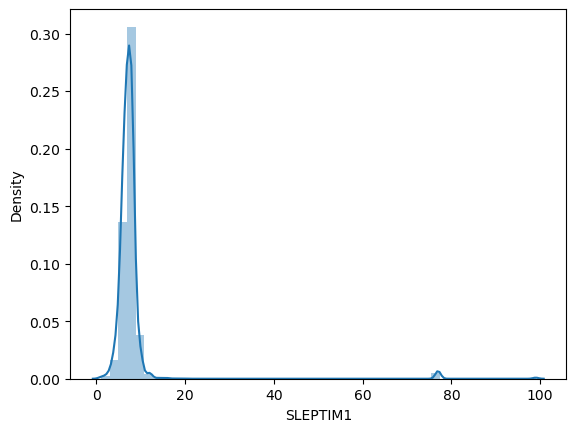

In [26]:
sns.distplot(new2_df["SLEPTIM1"])
print(new2_df["SLEPTIM1"].skew())
print(new2_df["SLEPTIM1"].kurt())

In [28]:
new2_df["SLEPTIM1"]=new2_df["SLEPTIM1"].replace(np.nan,new2_df["SLEPTIM1"].mean())

In [29]:
new2_df.head()

,X_MICHD,X_BMI5CAT,X_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,X_AGE_G,X_IMPRACE,EXERANY2,GENHLTH,ADDEPEV3,SLEPTIM1,ASTHMA3,X_MENT14D,CHCKDNY2,CHCSCNCR,X_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
0,0.0,1.0,1,2.0,2,2.0,5,1,1.0,2.0,1.0,5.0,1.0,3,2.0,1.0,2,1.0,1.0,2.0,2.0
1,0.0,3.0,9,2.0,2,2.0,6,2,1.0,3.0,1.0,7.0,1.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
2,0.0,3.0,4,2.0,2,2.0,6,2,1.0,3.0,2.0,7.0,2.0,1,2.0,2.0,1,1.0,2.0,1.0,2.0
3,0.0,3.0,4,2.0,2,2.0,6,1,2.0,1.0,2.0,6.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
4,0.0,2.0,4,1.0,2,2.0,6,1,1.0,2.0,2.0,7.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0


In [30]:
new2_df.shape

(401958, 21)

In [31]:
new2_df.isna().sum()

X_MICHD      0
X_BMI5CAT    0
X_SMOKER3    0
CVDSTRK3     0
SEXVAR       0
CVDINFR4     0
X_AGE_G      0
X_IMPRACE    0
EXERANY2     0
GENHLTH      0
ADDEPEV3     0
SLEPTIM1     0
ASTHMA3      0
X_MENT14D    0
CHCKDNY2     0
CHCSCNCR     0
X_PHYS14D    0
CHCOCNCR     0
CHCCOPD2     0
MARITAL      0
DIFFWALK     0
dtype: int64

In [32]:
df['X_MICHD'].value_counts(normalize = True)

2.0    0.914247
1.0    0.085753
Name: X_MICHD, dtype: float64

Text(0, 0.5, 'Count')

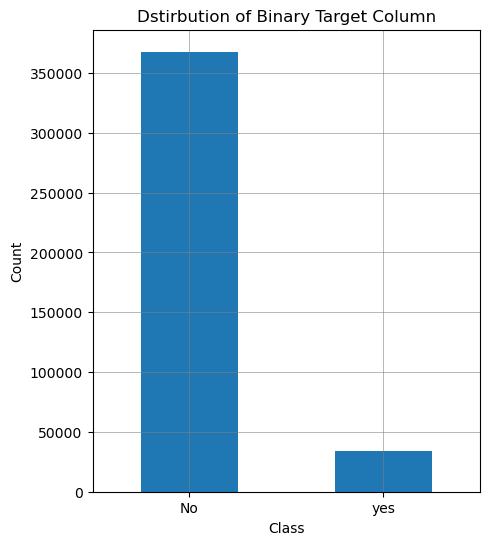

In [33]:
new2_df['X_MICHD'].value_counts().plot(kind='bar', figsize=(5,6), rot=0)
plt.title("Dstirbution of Binary Target Column")
plt.xticks(range(2), ['No','yes'])
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Class")
plt.ylabel("Count")

### Replacing Don't Know and Refused values given by users in dataset

In [34]:
cols_7=["CVDSTRK3","SEXVAR","CVDINFR4","EXERANY2","GENHLTH","ADDEPEV3","ASTHMA3","CHCKDNY2","CHCSCNCR","CHCOCNCR","CHCCOPD2",
       "DIFFWALK"]

cols_9 = ["X_SMOKER3","CVDSTRK3","SEXVAR","CVDINFR4","EXERANY2","GENHLTH","ADDEPEV3","ASTHMA3","X_MENT14D","CHCKDNY2","CHCSCNCR",
         "X_PHYS14D","CHCOCNCR","CHCCOPD2","MARITAL","DIFFWALK"]



cols_99_77= ["SLEPTIM1"]

cols=[cols_9,cols_7,cols_99_77]

In [35]:
#Function to Fill Refused and Don't Know Values 
def fill_dont_know(list1):
    for p in list1:
        
        if p == cols_9:
            
            for i in p:
                new2_df[i].mask(new2_df[i] == 9, new2_df[i].mode()[0], inplace=True)
        elif p == cols_7:
            for j in p:
                new2_df[j].mask(new2_df[j] == 7, new2_df[j].mode()[0], inplace=True)
        elif p == cols_99_77:
            for k in p:
                new2_df[k].mask(new2_df[k] == 77, new2_df[k].mean(), inplace=True)
                new2_df[k].mask(new2_df[k] == 99, new2_df[k].mean(), inplace=True)

In [132]:
new2_df.nunique()

X_MICHD       2
X_BMI5CAT     4
X_SMOKER3     4
CVDSTRK3      2
SEXVAR        2
CVDINFR4      2
X_AGE_G       6
X_IMPRACE     6
EXERANY2      2
GENHLTH       5
ADDEPEV3      2
SLEPTIM1     27
ASTHMA3       2
X_MENT14D     3
CHCKDNY2      2
CHCSCNCR      2
X_PHYS14D     3
CHCOCNCR      2
CHCCOPD2      2
MARITAL       6
DIFFWALK      2
dtype: int64

In [36]:
fill_dont_know(cols)

In [37]:
df.rename(columns = {'CHCKDNY2':'KIDNEY_DISEASE','CHCOCNCR':'CANCER','EXERANY2':'EXERCISE_PAST_MONTH','X_RFDRHV7':'HEAVY_DRINKERS',
'X_BMI5CAT':'BMI','X_AGE_G':'AGE_GROUP','X_DRDXAR2':'ARTHRITIS_DIAGNOSED','X_MICHD':'HEART_DISEASE',
'X_MENT14D':'MENTAL_HEALTH','X_PHYS14D':'PHYSICAL_HEALTH','FLUSHOT7':'FLU_SHOT','DIFFWALK':'DIFFICULTY_WALKING',
'DECIDE':'FOCUS','ADDEPEV3':'DEPRESSIVE_DISORDER','CHCCOPD2':'COPD_DISEASE','CHCSCNCR':'SKIN_CANCER','ASTHMA3':'ASTHAMA',
'CVDSTRK3':'STROKE','CVDCRHD4':'CORONARY_HEART_DISEASE_BEFORE','CVDINFR4':'MI_HEART_ATTACK_BEFORE','SLEPTIM1':'SLEEP_TIME','GENHLTH':'GEN_HEALTH','SEXVAR':'SEX'}, inplace = True)

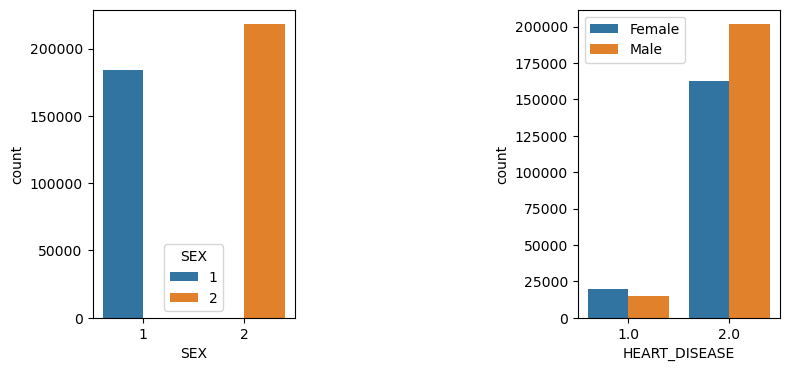

In [38]:
plt.figure(figsize=(12,4))
plt.subplot(1,4,1)
sns.countplot(x='SEX', data=df, hue='SEX')
plt.subplot(1,4,3)
sns.countplot(x='HEART_DISEASE',hue='SEX', data=df)
plt.legend(labels=['Female','Male'])

<Axes: xlabel='HEART_DISEASE', ylabel='count'>

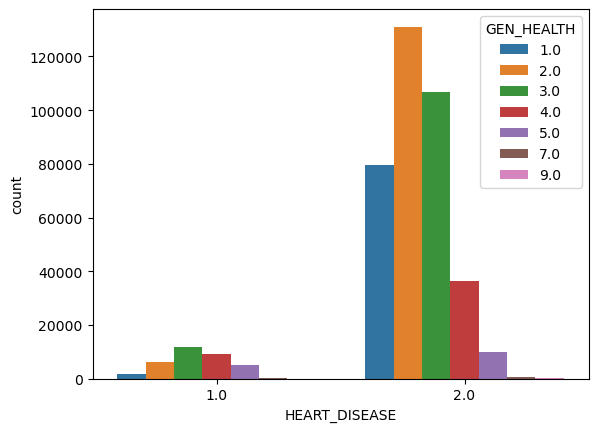

In [39]:
sns.countplot(x='HEART_DISEASE',hue='GEN_HEALTH', data=df)

<Axes: xlabel='HEART_DISEASE', ylabel='count'>

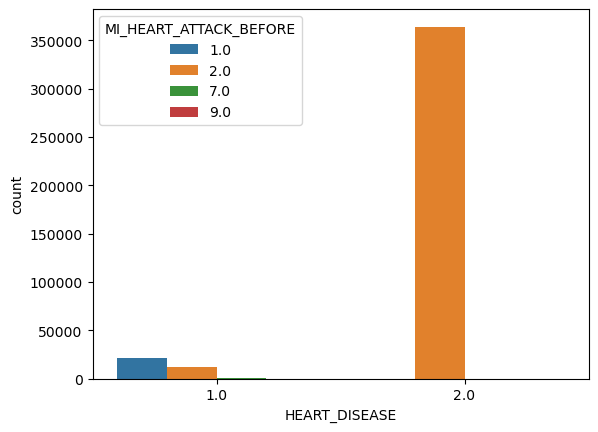

In [40]:
sns.countplot(x='HEART_DISEASE',hue='MI_HEART_ATTACK_BEFORE', data=df)

<Axes: xlabel='HEART_DISEASE', ylabel='count'>

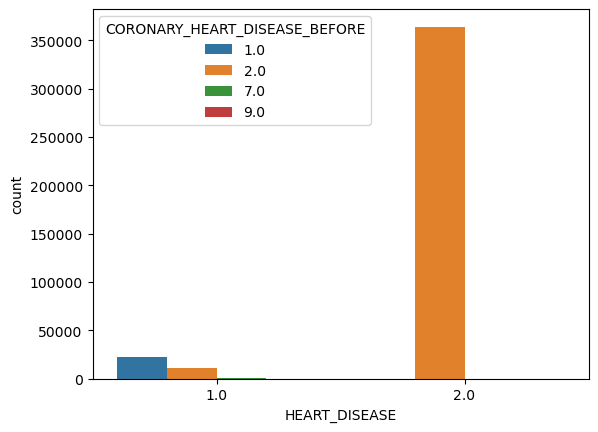

In [41]:
sns.countplot(x='HEART_DISEASE',hue='CORONARY_HEART_DISEASE_BEFORE', data=df)

<Axes: xlabel='HEART_DISEASE', ylabel='count'>

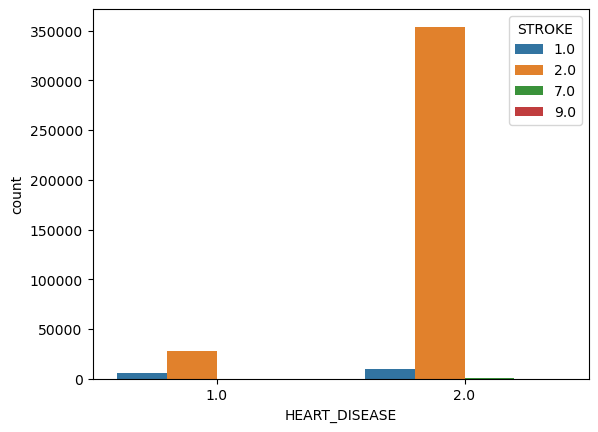

In [42]:
sns.countplot(x='HEART_DISEASE',hue='STROKE', data=df)

<Axes: xlabel='HEART_DISEASE', ylabel='count'>

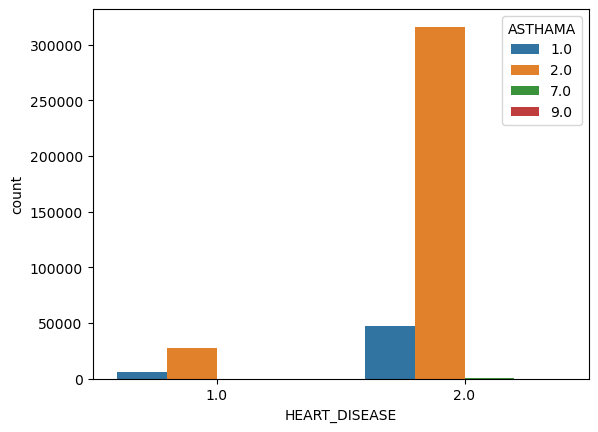

In [43]:
sns.countplot(x='HEART_DISEASE',hue='ASTHAMA', data=df)

<Axes: xlabel='HEART_DISEASE', ylabel='count'>

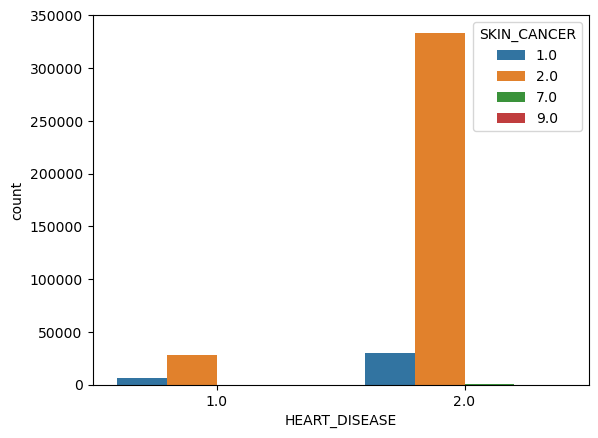

In [44]:
sns.countplot(x='HEART_DISEASE',hue='SKIN_CANCER', data=df)

<Axes: xlabel='HEART_DISEASE', ylabel='count'>

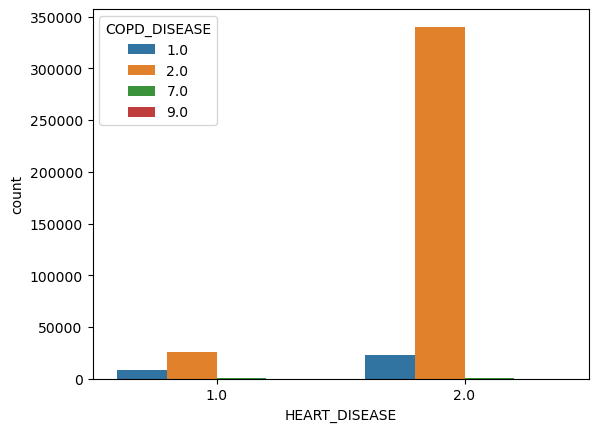

In [45]:
sns.countplot(x='HEART_DISEASE',hue='COPD_DISEASE', data=df)

<Axes: xlabel='HEART_DISEASE', ylabel='count'>

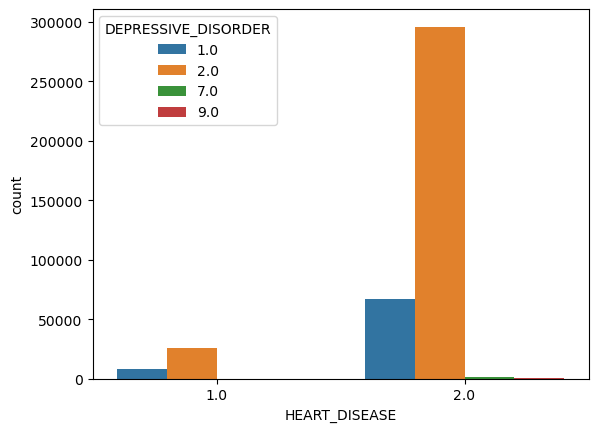

In [46]:
sns.countplot(x='HEART_DISEASE',hue='DEPRESSIVE_DISORDER', data=df)

<Axes: xlabel='HEART_DISEASE', ylabel='count'>

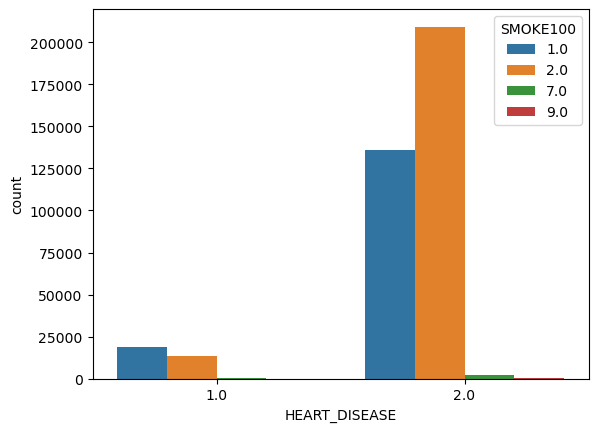

In [47]:
sns.countplot(x='HEART_DISEASE',hue='SMOKE100', data=df)

<Axes: xlabel='HEART_DISEASE', ylabel='count'>

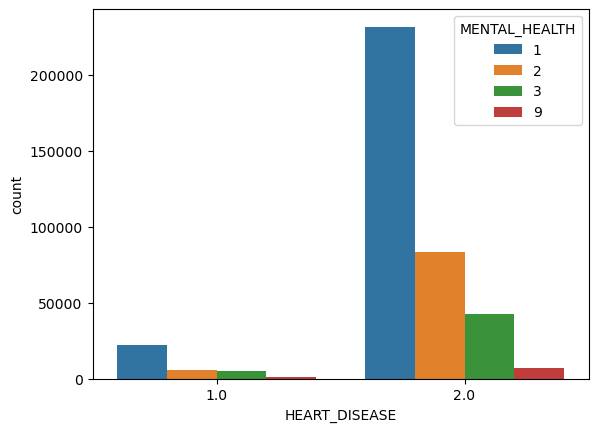

In [48]:
sns.countplot(x='HEART_DISEASE',hue='MENTAL_HEALTH', data=df)

<Axes: xlabel='HEART_DISEASE', ylabel='count'>

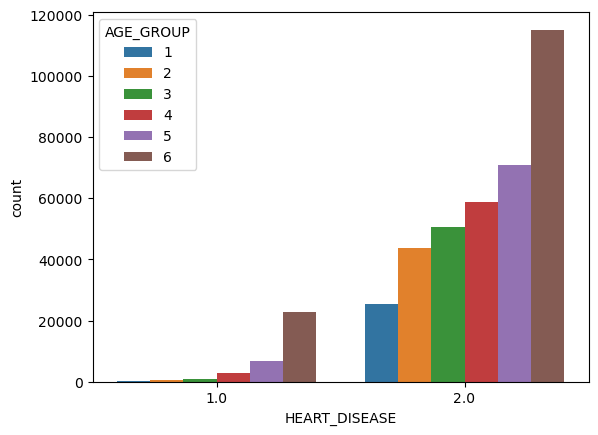

In [49]:
sns.countplot(x='HEART_DISEASE',hue='AGE_GROUP', data=df)

<Axes: xlabel='HEART_DISEASE', ylabel='count'>

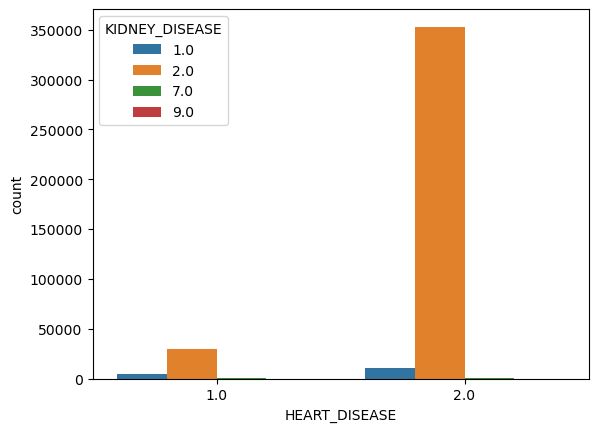

In [50]:
sns.countplot(x='HEART_DISEASE',hue='KIDNEY_DISEASE', data=df)

<Axes: xlabel='HEART_DISEASE', ylabel='count'>

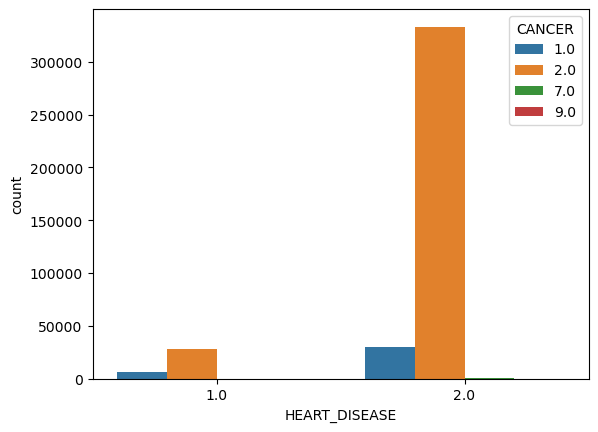

In [51]:
sns.countplot(x='HEART_DISEASE',hue='CANCER', data=df)

In [133]:
new2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   X_MICHD    401958 non-null  float64
 1   X_BMI5CAT  401958 non-null  float64
 2   X_SMOKER3  401958 non-null  int64  
 3   CVDSTRK3   401958 non-null  float64
 4   SEXVAR     401958 non-null  int64  
 5   CVDINFR4   401958 non-null  float64
 6   X_AGE_G    401958 non-null  int64  
 7   X_IMPRACE  401958 non-null  int64  
 8   EXERANY2   401958 non-null  float64
 9   GENHLTH    401958 non-null  float64
 10  ADDEPEV3   401958 non-null  float64
 11  SLEPTIM1   401958 non-null  float64
 12  ASTHMA3    401958 non-null  float64
 13  X_MENT14D  401958 non-null  int64  
 14  CHCKDNY2   401958 non-null  float64
 15  CHCSCNCR   401958 non-null  float64
 16  X_PHYS14D  401958 non-null  int64  
 17  CHCOCNCR   401958 non-null  float64
 18  CHCCOPD2   401958 non-null  float64
 19  MARITAL    401958 non-n

In [27]:
df[['SLEPTIM1', 'X_MICHD']].corr()

,SLEPTIM1,X_MICHD
SLEPTIM1,1.000000,-0.023226
X_MICHD,-0.023226,1.000000


In [135]:
# As SLEPTIM1 Not Strongly Related to Target feature, we will drop the feature
new2_df.drop(['SLEPTIM1'],axis=1,inplace=True)

In [136]:
new2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Data columns (total 20 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   X_MICHD    401958 non-null  float64
 1   X_BMI5CAT  401958 non-null  float64
 2   X_SMOKER3  401958 non-null  int64  
 3   CVDSTRK3   401958 non-null  float64
 4   SEXVAR     401958 non-null  int64  
 5   CVDINFR4   401958 non-null  float64
 6   X_AGE_G    401958 non-null  int64  
 7   X_IMPRACE  401958 non-null  int64  
 8   EXERANY2   401958 non-null  float64
 9   GENHLTH    401958 non-null  float64
 10  ADDEPEV3   401958 non-null  float64
 11  ASTHMA3    401958 non-null  float64
 12  X_MENT14D  401958 non-null  int64  
 13  CHCKDNY2   401958 non-null  float64
 14  CHCSCNCR   401958 non-null  float64
 15  X_PHYS14D  401958 non-null  int64  
 16  CHCOCNCR   401958 non-null  float64
 17  CHCCOPD2   401958 non-null  float64
 18  MARITAL    401958 non-null  float64
 19  DIFFWALK   401958 non-n

In [137]:
#new2_df.to_csv('cleaned.csv')

In [53]:
X=new2_df.drop(['X_MICHD'],axis=1)
Y=new2_df['X_MICHD']

In [54]:
X.isnull().sum()

X_BMI5CAT    0
X_SMOKER3    0
CVDSTRK3     0
SEXVAR       0
CVDINFR4     0
X_AGE_G      0
X_IMPRACE    0
EXERANY2     0
GENHLTH      0
ADDEPEV3     0
ASTHMA3      0
X_MENT14D    0
CHCKDNY2     0
CHCSCNCR     0
X_PHYS14D    0
CHCOCNCR     0
CHCCOPD2     0
MARITAL      0
DIFFWALK     0
dtype: int64

### Selecting Best features Using Chi square test score

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.sort_values(by='Score',ascending=[False])

,Specs,Score
5,X_AGE_G,10594.120267
8,GENHLTH,10395.357866
4,CVDINFR4,6637.611678
14,X_PHYS14D,2883.137069
18,DIFFWALK,1034.226157
17,MARITAL,749.088122
6,X_IMPRACE,624.303810
7,EXERANY2,554.817730
1,X_SMOKER3,531.538794
16,CHCCOPD2,501.283286


In [56]:
X = X[['X_AGE_G','GENHLTH','CVDINFR4','X_PHYS14D','DIFFWALK','MARITAL','X_IMPRACE','EXERANY2','X_SMOKER3','CHCCOPD2','SEXVAR','CVDSTRK3','X_BMI5CAT','CHCKDNY2','CHCSCNCR','CHCOCNCR','ADDEPEV3','ASTHMA3','X_MENT14D']]
X.head()
#X = X[['X_AGE_G','GENHLTH','CVDINFR4','X_PHYS14D','DIFFWALK','MARITAL','X_IMPRACE','EXERANY2','X_SMOKER3','CHCCOPD2']]


,X_AGE_G,GENHLTH,CVDINFR4,X_PHYS14D,DIFFWALK,MARITAL,X_IMPRACE,EXERANY2,X_SMOKER3,CHCCOPD2,SEXVAR,CVDSTRK3,X_BMI5CAT,CHCKDNY2,CHCSCNCR,CHCOCNCR,ADDEPEV3,ASTHMA3,X_MENT14D
0,5,2.0,2.0,2,2.0,2.0,1,1.0,1,1.0,2,2.0,1.0,2.0,1.0,1.0,1.0,1.0,3
1,6,3.0,2.0,1,2.0,3.0,2,1.0,4,2.0,2,2.0,3.0,2.0,2.0,2.0,1.0,1.0,1
2,6,3.0,2.0,1,2.0,1.0,2,1.0,4,2.0,2,2.0,3.0,2.0,2.0,1.0,2.0,2.0,1
3,6,1.0,2.0,1,2.0,3.0,1,2.0,4,2.0,2,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1
4,6,2.0,2.0,1,2.0,3.0,1,1.0,4,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1


In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   X_AGE_G    401958 non-null  int64  
 1   GENHLTH    401958 non-null  float64
 2   CVDINFR4   401958 non-null  float64
 3   X_PHYS14D  401958 non-null  int64  
 4   DIFFWALK   401958 non-null  float64
 5   MARITAL    401958 non-null  float64
 6   X_IMPRACE  401958 non-null  int64  
 7   EXERANY2   401958 non-null  float64
 8   X_SMOKER3  401958 non-null  int64  
 9   CHCCOPD2   401958 non-null  float64
 10  SEXVAR     401958 non-null  int64  
 11  CVDSTRK3   401958 non-null  float64
 12  X_BMI5CAT  401958 non-null  float64
 13  CHCKDNY2   401958 non-null  float64
 14  CHCSCNCR   401958 non-null  float64
 15  CHCOCNCR   401958 non-null  float64
 16  ADDEPEV3   401958 non-null  float64
 17  ASTHMA3    401958 non-null  float64
 18  X_MENT14D  401958 non-null  int64  
dtypes: float64(13), int64(6

## Stratified splitting

Stratified splitting means that when you generate a training / validation dataset split, it will attempt to keep the same percentages of classes in each split.

These dataset divisions are usually generated randomly according to a target variable. However, when doing so, the proportions of the target variable among the different splits can differ, especially in the case of small datasets.


![](https://i.stack.imgur.com/B9CCp.png)

In [58]:
def split(X,Y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42,)
    return X_train, X_test, y_train, y_test

In [59]:
X_train, X_test, y_train, y_test = split(X,Y)

## **Model Building**  

In [60]:
def create_dt_model():
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(max_depth=10)
    model.fit(X_train,y_train)
    return model


In [61]:
def create_rf_model():
    from sklearn.ensemble import RandomForestClassifier 
    model= RandomForestClassifier(n_estimators= 101, criterion="entropy")  
    model.fit(X_train, y_train)
    return model

In [62]:
# XGBoost Model
def create_XGB_model():
    model= XGBClassifier()  
    model.fit(X_train , y_train) 
    return model

In [63]:
def create_CB_model():
    model=CatBoostClassifier()
    model.fit(X_train , y_train)
    return model

## Model Evaluation

We compare the capability of different approaches concerning their performance on common grounds, which we call evaluation metrics.
classification metrics: Accuracy, Recall, Precision, and F1- Score


* True Positive (TP) : Observation is positive, and is predicted to be positive.
* False Negative (FN) : Observation is positive, but is predicted negative.
* True Negative (TN) : Observation is negative, and is predicted to be negative.
* False Positive (FP) : Observation is negative, but is predicted positive.



<img src="https://miro.medium.com/v2/resize:fit:1400/1*UVP_xb4F6J-M-xH3haz5Jw.png" width="600" height="200" class="blog-image">



In [64]:
def evaluate_model(model):
    y_true = y_test
    y_pred = model.predict(X_test)
    
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    accuracy = f"{accuracy_score(y_true, y_pred):.2f}"
    precision = f"{precision_score(y_true, y_pred):.2f}"
    recall = f"{recall_score(y_true, y_pred):.2f}"
    f1 = f"{f1_score(y_true, y_pred):.2f}"
    return accuracy, precision, recall, f1




In [65]:
def Model_score():
    models = [
        {"name": "DescisionTree", "model": model_dt},
        {"name": "RandomForest", "model": model_rf},
        {"name": "XGBoost", "model": model_XGB},
        {"name": "CatBoost", "model": model_CB}
    ]

    print("-" * 66)
    print(f"|{'algo':^15}|{'accuray':^10}|{'precision':^15}|{'recall':^10}|{'f1':^10}|")
    print("-" * 66)

    for model_info in models:
        evaluation = evaluate_model(model_info['model'])
        print(f"|{model_info['name']:^15}|{evaluation[0]:^10}|{evaluation[1]:^15}|{evaluation[2]:^10}|{evaluation[3]:^10}|")

    print("-" * 66)



# **Baseline (no oversampling)**

In [66]:
model_dt = create_dt_model()
model_rf = create_rf_model()
model_XGB = create_XGB_model()
model_CB = create_CB_model()

Learning rate set to 0.12121
0:	learn: 0.4903015	total: 120ms	remaining: 1m 59s
1:	learn: 0.3701594	total: 173ms	remaining: 1m 26s
2:	learn: 0.2817771	total: 224ms	remaining: 1m 14s
3:	learn: 0.2314578	total: 272ms	remaining: 1m 7s
4:	learn: 0.1966572	total: 324ms	remaining: 1m 4s
5:	learn: 0.1726779	total: 370ms	remaining: 1m 1s
6:	learn: 0.1576643	total: 418ms	remaining: 59.3s
7:	learn: 0.1458213	total: 471ms	remaining: 58.3s
8:	learn: 0.1378482	total: 533ms	remaining: 58.7s
9:	learn: 0.1311612	total: 584ms	remaining: 57.8s
10:	learn: 0.1267325	total: 634ms	remaining: 57s
11:	learn: 0.1237665	total: 686ms	remaining: 56.5s
12:	learn: 0.1215972	total: 733ms	remaining: 55.7s
13:	learn: 0.1197903	total: 784ms	remaining: 55.2s
14:	learn: 0.1184939	total: 833ms	remaining: 54.7s
15:	learn: 0.1175116	total: 885ms	remaining: 54.5s
16:	learn: 0.1166789	total: 929ms	remaining: 53.7s
17:	learn: 0.1161034	total: 979ms	remaining: 53.4s
18:	learn: 0.1155433	total: 1.02s	remaining: 52.9s
19:	learn: 

In [67]:
Model_score()

------------------------------------------------------------------
|     algo      | accuray  |   precision   |  recall  |    f1    |
------------------------------------------------------------------
| DescisionTree |   0.97   |     0.98      |   0.65   |   0.78   |
| RandomForest  |   0.97   |     0.94      |   0.65   |   0.77   |
|    XGBoost    |   0.97   |     1.00      |   0.65   |   0.79   |
|   CatBoost    |   0.97   |     0.99      |   0.65   |   0.79   |
------------------------------------------------------------------


In [94]:
data= [[0.97,0.98,0.65,0.78],[0.97,0.94,0.65,0.77],[0.97,1.00,0.65,0.79],[0.97,0.99,0.65,0.79]]
model_score_NoSampling = pd.DataFrame(data,columns=['accuracy','precision','recall','f1'],index=['DescisionTree','RandomForest','XGBoost','CATBoost'])

In [95]:
model_score_NoSampling

,accuracy,precision,recall,f1
DescisionTree,0.97,0.98,0.65,0.78
RandomForest,0.97,0.94,0.65,0.77
XGBoost,0.97,1.00,0.65,0.79
CATBoost,0.97,0.99,0.65,0.79


<Figure size 400x400 with 0 Axes>

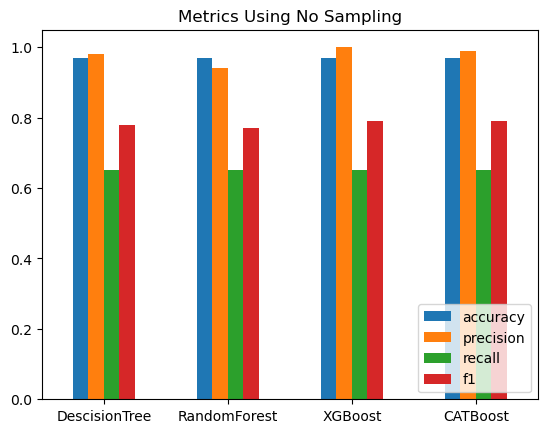

In [112]:
plt.figure(figsize=(4,4))
model_score_NoSampling.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Metrics Using No Sampling')
plt.legend(loc=4)
plt.show()

## Oversample/undersample  

It's Good Practice to Always split into test and train sets BEFORE trying oversampling/undersampling techniques!

Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow model to simply memorize specific data points and cause overfitting and poor generalization to the test data. Data leakage can cause you to create overly optimistic if not completely invalid predictive models.


![](https://miro.medium.com/v2/resize:fit:725/1*7xf9e1EaoK5n05izIFBouA.png)

# **UnderSampling**

In [71]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, Y)
print(len(X_res),len(y_res))

68326 68326


In [72]:
X_train_UnderSample, X_test_UnderSample, y_train_UnderSample, y_test_UnderSample = split(X_res,y_res)
print(len(X_train_UnderSample), len(X_test_UnderSample), len(y_train_UnderSample), len(y_test_UnderSample))


# Using UnderSampled Data For Training and Initial Testing data (i.e. X_test, y_test)
X_train = X_train_UnderSample
y_train = y_train_UnderSample

54660 13666 54660 13666


In [73]:
model_dt = create_dt_model()
model_rf = create_rf_model()
model_XGB = create_XGB_model()
model_CB = create_CB_model()

Learning rate set to 0.056875
0:	learn: 0.6137042	total: 14.3ms	remaining: 14.2s
1:	learn: 0.5508230	total: 26.7ms	remaining: 13.3s
2:	learn: 0.5009831	total: 40.6ms	remaining: 13.5s
3:	learn: 0.4641586	total: 54.3ms	remaining: 13.5s
4:	learn: 0.4340672	total: 68.7ms	remaining: 13.7s
5:	learn: 0.4118148	total: 82.8ms	remaining: 13.7s
6:	learn: 0.3948031	total: 96.9ms	remaining: 13.8s
7:	learn: 0.3806162	total: 113ms	remaining: 14s
8:	learn: 0.3693541	total: 127ms	remaining: 13.9s
9:	learn: 0.3601472	total: 141ms	remaining: 13.9s
10:	learn: 0.3531654	total: 154ms	remaining: 13.9s
11:	learn: 0.3459792	total: 167ms	remaining: 13.8s
12:	learn: 0.3402610	total: 180ms	remaining: 13.7s
13:	learn: 0.3353793	total: 196ms	remaining: 13.8s
14:	learn: 0.3312220	total: 210ms	remaining: 13.8s
15:	learn: 0.3274635	total: 222ms	remaining: 13.7s
16:	learn: 0.3243204	total: 236ms	remaining: 13.6s
17:	learn: 0.3213968	total: 250ms	remaining: 13.6s
18:	learn: 0.3191720	total: 264ms	remaining: 13.6s
19:	le

In [74]:
Model_score() #UNDERSAMPLING SCORE

------------------------------------------------------------------
|     algo      | accuray  |   precision   |  recall  |    f1    |
------------------------------------------------------------------
| DescisionTree |   0.89   |     0.42      |   0.82   |   0.55   |
| RandomForest  |   0.89   |     0.42      |   0.92   |   0.57   |
|    XGBoost    |   0.89   |     0.43      |   0.83   |   0.57   |
|   CatBoost    |   0.90   |     0.44      |   0.83   |   0.57   |
------------------------------------------------------------------


In [113]:
data= [[0.89,0.42,0.82,0.55],[0.89,0.42,0.92,0.57],[0.89,0.43,0.83,0.57],[0.90,0.44,0.83,0.57]]
model_score_UnderSampling = pd.DataFrame(data,columns=['accuracy','precision','recall','f1'],index=['DescisionTree','RandomForest','XGBoost','CATBoost'])

In [114]:
model_score_UnderSampling

,accuracy,precision,recall,f1
DescisionTree,0.89,0.42,0.82,0.55
RandomForest,0.89,0.42,0.92,0.57
XGBoost,0.89,0.43,0.83,0.57
CATBoost,0.90,0.44,0.83,0.57


<Figure size 1000x300 with 0 Axes>

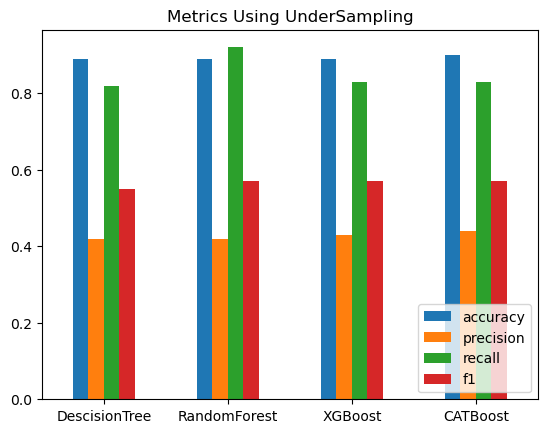

In [117]:
plt.figure(figsize=(10,3))
model_score_UnderSampling.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Metrics Using UnderSampling')
plt.legend(loc=4)
plt.show()

# **OverSampling**

In [78]:
from imblearn.over_sampling import RandomOverSampler
os1 = RandomOverSampler()
X_res,y_res=os1.fit_resample(X, Y)
print(len(X_res),len(y_res))

735590 735590


In [79]:
X_train_OverSampled, X_test_OverSampled, y_train_OverSampled, y_test_OverSampled = split(X_res,y_res)
print(len(X_train_OverSampled), len(X_test_OverSampled), len(y_train_OverSampled), len(y_test_OverSampled))



# Using OverSampled Data For Training and Initial Testing data (i.e. X_test, y_test)
X_train = X_train_OverSampled
y_train = y_train_OverSampled

588472 147118 588472 147118


In [80]:
model_dt = create_dt_model()
model_rf = create_rf_model()
model_XGB = create_XGB_model()
model_CB = create_CB_model()

Learning rate set to 0.156894
0:	learn: 0.4781526	total: 113ms	remaining: 1m 52s
1:	learn: 0.3987028	total: 207ms	remaining: 1m 43s
2:	learn: 0.3605702	total: 294ms	remaining: 1m 37s
3:	learn: 0.3418895	total: 384ms	remaining: 1m 35s
4:	learn: 0.3284353	total: 470ms	remaining: 1m 33s
5:	learn: 0.3201623	total: 551ms	remaining: 1m 31s
6:	learn: 0.3158475	total: 631ms	remaining: 1m 29s
7:	learn: 0.3109442	total: 711ms	remaining: 1m 28s
8:	learn: 0.3080416	total: 801ms	remaining: 1m 28s
9:	learn: 0.3055478	total: 898ms	remaining: 1m 28s
10:	learn: 0.3039699	total: 974ms	remaining: 1m 27s
11:	learn: 0.3025640	total: 1.06s	remaining: 1m 27s
12:	learn: 0.3010046	total: 1.14s	remaining: 1m 26s
13:	learn: 0.2999089	total: 1.22s	remaining: 1m 25s
14:	learn: 0.2992509	total: 1.29s	remaining: 1m 24s
15:	learn: 0.2985381	total: 1.37s	remaining: 1m 24s
16:	learn: 0.2980140	total: 1.45s	remaining: 1m 23s
17:	learn: 0.2973148	total: 1.52s	remaining: 1m 23s
18:	learn: 0.2967943	total: 1.6s	remaining: 

In [81]:
Model_score() #OVERSAMPLING SCORE

------------------------------------------------------------------
|     algo      | accuray  |   precision   |  recall  |    f1    |
------------------------------------------------------------------
| DescisionTree |   0.89   |     0.42      |   0.83   |   0.56   |
| RandomForest  |   0.96   |     0.67      |   0.94   |   0.79   |
|    XGBoost    |   0.90   |     0.46      |   0.83   |   0.59   |
|   CatBoost    |   0.91   |     0.47      |   0.84   |   0.60   |
------------------------------------------------------------------


In [118]:
data= [[0.89,0.42,0.83,0.56],[0.96,0.67,0.94,0.79],[0.90,0.46,0.83,0.59],[0.91,0.47,0.84,0.60]]
model_score_OverSampling = pd.DataFrame(data,columns=['accuracy','precision','recall','f1'],index=['DescisionTree','RandomForest','XGBoost','CATBoost'])

In [119]:
model_score_OverSampling

,accuracy,precision,recall,f1
DescisionTree,0.89,0.42,0.83,0.56
RandomForest,0.96,0.67,0.94,0.79
XGBoost,0.90,0.46,0.83,0.59
CATBoost,0.91,0.47,0.84,0.60


<Figure size 1000x300 with 0 Axes>

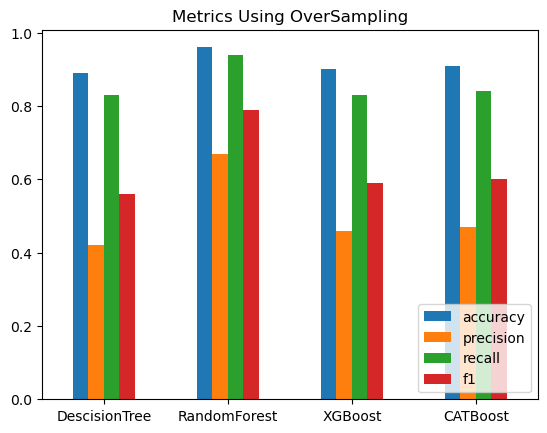

In [121]:
plt.figure(figsize=(10,3))
model_score_OverSampling.plot(kind='bar')
plt.xticks(rotation=0)
plt.legend(loc=4)
plt.title('Metrics Using OverSampling')
plt.show()

As we can see the 95% F1 Score and accuracy that we obtained using Random Forest.

## USING SMOTE (Synthetic Minority Oversampling Technique)

Unlike random oversampling, in SMOTE al- gorithm minority class is oversampled by generating synthetic examples rather than by oversampling with replacement. The SMOTE algorithm creates artificial examples based on the feature space, rather than data space, similarities between existing minority examples.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.
SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

![](https://www.mdpi.com/information/information-14-00054/article_deploy/html/images/information-14-00054-g003.png)

In [85]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res,y_res=sm.fit_resample(X, Y)
print(len(X_res),len(y_res))

735590 735590


In [86]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = split(X_res,y_res)
print(len(X_train_smote), len(X_test_smote), len(y_train_smote), len(y_test_smote))


# Using SMOTE Sampled Data For Training and Initial Testing data (i.e. X_test, y_test)
X_train = X_train_smote
y_train = y_train_smote

588472 147118 588472 147118


In [87]:
model_dt = create_dt_model()
model_rf = create_rf_model()
model_XGB = create_XGB_model()
model_CB = create_CB_model()

Learning rate set to 0.156894
0:	learn: 0.4614265	total: 129ms	remaining: 2m 9s
1:	learn: 0.3603551	total: 238ms	remaining: 1m 58s
2:	learn: 0.3179336	total: 349ms	remaining: 1m 56s
3:	learn: 0.2910611	total: 470ms	remaining: 1m 57s
4:	learn: 0.2737075	total: 562ms	remaining: 1m 51s
5:	learn: 0.2619673	total: 682ms	remaining: 1m 53s
6:	learn: 0.2521681	total: 821ms	remaining: 1m 56s
7:	learn: 0.2442559	total: 929ms	remaining: 1m 55s
8:	learn: 0.2387129	total: 1.03s	remaining: 1m 53s
9:	learn: 0.2322406	total: 1.13s	remaining: 1m 51s
10:	learn: 0.2227836	total: 1.23s	remaining: 1m 50s
11:	learn: 0.2193134	total: 1.34s	remaining: 1m 50s
12:	learn: 0.2116774	total: 1.46s	remaining: 1m 50s
13:	learn: 0.2086661	total: 1.56s	remaining: 1m 50s
14:	learn: 0.2075100	total: 1.67s	remaining: 1m 49s
15:	learn: 0.2045142	total: 1.78s	remaining: 1m 49s
16:	learn: 0.1981679	total: 1.9s	remaining: 1m 49s
17:	learn: 0.1933081	total: 2.01s	remaining: 1m 49s
18:	learn: 0.1897178	total: 2.13s	remaining: 1

In [88]:
Model_score() #SMOTE SCORE

------------------------------------------------------------------
|     algo      | accuray  |   precision   |  recall  |    f1    |
------------------------------------------------------------------
| DescisionTree |   0.93   |     0.56      |   0.75   |   0.64   |
| RandomForest  |   0.97   |     0.77      |   0.85   |   0.81   |
|    XGBoost    |   0.96   |     0.84      |   0.68   |   0.75   |
|   CatBoost    |   0.96   |     0.80      |   0.69   |   0.74   |
------------------------------------------------------------------


In [122]:
data= [[0.93,0.56,0.75,0.64],[0.97,0.77,0.85,0.81],[0.96,0.84,0.68,0.75],[0.96,0.80,0.69,0.74]]
model_score_smote = pd.DataFrame(data,columns=['accuracy','precision','recall','f1'],index=['DescisionTree','RandomForest','XGBoost','CATBoost'])

In [123]:
model_score_smote

,accuracy,precision,recall,f1
DescisionTree,0.93,0.56,0.75,0.64
RandomForest,0.97,0.77,0.85,0.81
XGBoost,0.96,0.84,0.68,0.75
CATBoost,0.96,0.80,0.69,0.74


<Figure size 1000x300 with 0 Axes>

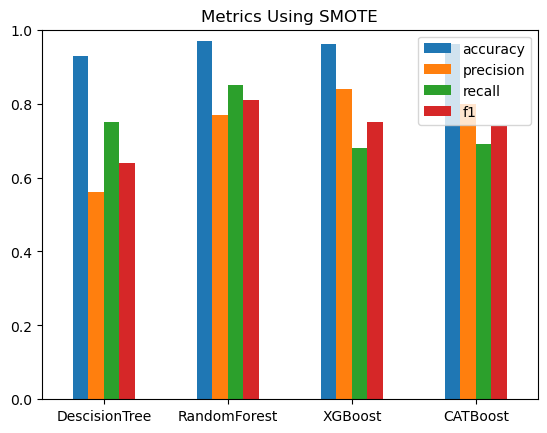

In [124]:
plt.figure(figsize=(10,3))
model_score_smote.plot(kind='bar',ylim=(0,1))
plt.xticks(rotation=0)
plt.title('Metrics Using SMOTE')
plt.show()

## **Performance comparison**

In [125]:
metrics = {}
metrics['No Sampling'] = model_score_NoSampling
metrics['Under Sampling'] = model_score_UnderSampling
metrics['Over Sampling'] = model_score_OverSampling
metrics['SMOTE'] = model_score_smote
algo_metrics = pd.concat(metrics, axis=1)
algo_metrics

No Sampling                        Under Sampling            \
                 accuracy precision recall    f1       accuracy precision   
DescisionTree        0.97      0.98   0.65  0.78           0.89      0.42   
RandomForest         0.97      0.94   0.65  0.77           0.89      0.42   
XGBoost              0.97      1.00   0.65  0.79           0.89      0.43   
CATBoost             0.97      0.99   0.65  0.79           0.90      0.44   

                           Over Sampling                           SMOTE  \
              recall    f1      accuracy precision recall    f1 accuracy   
DescisionTree   0.82  0.55          0.89      0.42   0.83  0.56     0.93   
RandomForest    0.92  0.57          0.96      0.67   0.94  0.79     0.97   
XGBoost         0.83  0.57          0.90      0.46   0.83  0.59     0.96   
CATBoost        0.83  0.57          0.91      0.47   0.84  0.60     0.96   

                                      
              precision recall    f1  
DescisionTree      0.56   0.75  0.64  
RandomForest       0.77   0.85  0.81  
XGBoost            0.84   0.68  0.75  
CATBoost           0.80   0.69  0.74

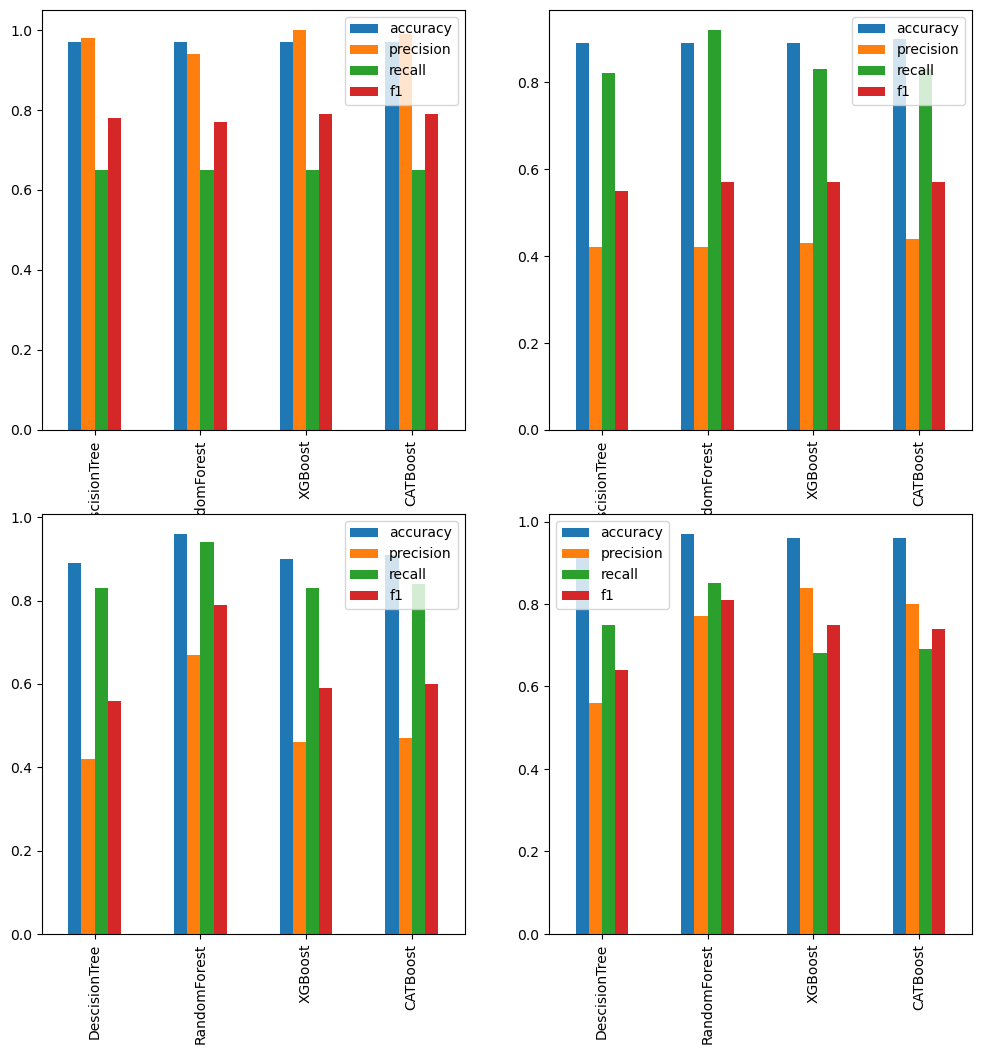

In [130]:
df_list = [model_score_NoSampling ,model_score_UnderSampling, model_score_OverSampling, model_score_smote]
fig, axes = plt.subplots(2,2,figsize=(12,12))

count=0
for r in range(2):
    for c in range(2):
        df_list[count].plot(ax=axes[r,c],kind='bar')
        count+=1

# **Summary**

1.  SMOTE Oversampling achived best f1 and accuracy score with RandomForest algorithm .
* accuracy - 97%
* precision - 77%
* recall - 85%
* f1 - 81%

2. Random OverSampling also providing best result with least changes.
* accuracy - 96%
* precision - 67%
* recall - 94%
* f1 - 79%

#### Which model is the best? It depend on a business decision.
We will proceed with RandomForest with SMOTE as best estimator.

## **PICKLING MODEL FILE**

In [139]:
import pickle
#pickle.dump(model_rf,open('model.pkl','wb'))